In [5]:
import os
from collections import defaultdict
import numpy as np
# Define the directories and platforms
cpu_platforms = ["Pennylane", "Qiskit", "ProjectQ", "Qsun"]
hardware_platforms = ["FP32", "FX24", "FX32"]
qubits = range(3, 18) 
depths = range(1, 11) 

results = {app: defaultdict(lambda: defaultdict(dict)) for app in ["qft", "psr", "qrc"]}

for app in ["qft", "psr", "qrc"]:
    
        # Handle qft and psr apps
        for platform in cpu_platforms:
            if app in ["qft", "psr"]:
                time_file = f"../time/{app}/{app}_{platform}_cad114_Time.txt"
                
            else:
                time_file = f"../time/qrc/QRC_{platform}_cad114_depth10_Time.txt"
            power_file = f"../power/{app}/{app}_{platform}_cad114_power.txt"
            times = np.loadtxt(time_file)
            powers = np.loadtxt(power_file)
            for i, qubit in enumerate(qubits):
                pdp = powers[i] * times[i]
                results[app][platform][qubit] = {
					"time": times[i],
					"power": powers[i],
					"pdp": pdp,
				}

        for platform in hardware_platforms:
            if app in ["qft", "psr"]:
                time_file = f"../time/{app}/{app.upper()}_{platform}_Time.txt"
                power = {
					"FP32": 0.3,
					"FX24": 0.36,
					"FX32": 0.23
				}[platform]
            else:
                time_file = f"../time/FPGA_QRC/{platform}/time/{platform}_10_Time.txt"
                power = {
					"FP32": 0.91,
					"FX24": 0.91,
					"FX32": 0.81
				}[platform]
            for i, qubit in enumerate(qubits):
                pdp = powers[i] * times[i]
                results[app][platform][qubit] = {
                        "time": times[i],
                        "power": powers[i],
                        "pdp": pdp,
                    }

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

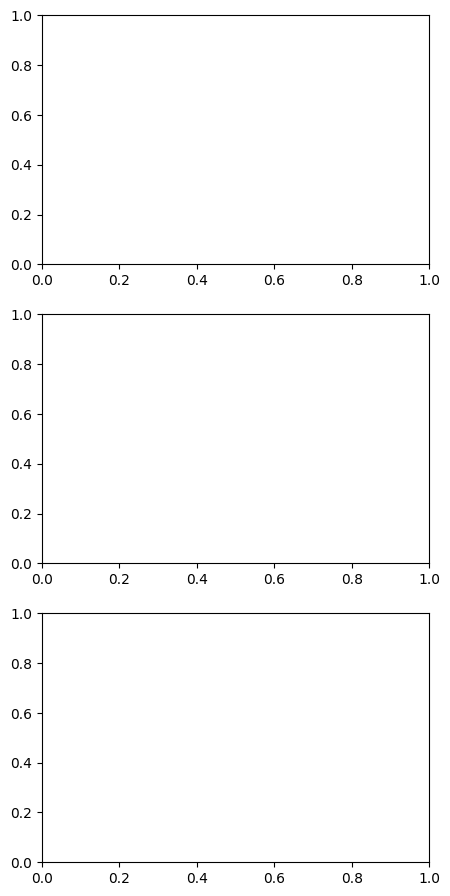

In [8]:
import os
from collections import defaultdict
import numpy as np
hardware_platforms = ["FP16", "FP32", "FX16", "FX24", "FX32"]

qubits = range(3, 18)  # Qubit range from 3 to 17 (15 lines)
depths = range(1, 11)  # Assuming depth ranges from 1 to 10 for qrc
colors = {
    'FP16': 'blue',
    'FP32': 'orange',
    'FX16': 'green',
    'FX24': 'red',
    'FX32': 'purple',
}

import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(5, 11))

for j in range(3):
    for i in range(2):
        if i == 0:
            axs[i, j].set_yscale('log')  
        axs[i, j].grid()
        axs[i, j].set_xticks(qubits)
        axs[i, j].set_xticklabels([])

axs[0, 0].set_ylabel('MSE')
axs[1, 0].set_ylabel(r'$\mathcal{F}$')
axs[0, 2].legend(loc='upper left', ncols = 3)
for i in range(3):
    axs[1, i].set_xticklabels(qubits)
    axs[1, i].set_xlabel('#Qubits')
    axs[1, i].set_ylim(0.8, 1.2)
    axs[0, i].set_ylim(10**(-14), 10**(-3))

for i in range(2):
    for j in range(1,3):
        axs[i, j].set_yticklabels([])
plt.tight_layout()
#plt.savefig('../images/mse_and_fidelity_for_3.svg')

In [6]:
for app, platforms in results.items():
	print(f"App: {app}")
	for platform, qubit_data in platforms.items():
		print(f"  Platform: {platform}")
		for qubit, metrics in qubit_data.items():
			print(f"    Qubit: {qubit}")
			print(f"      Time: {metrics['time']} s, Power: {metrics['power']} W, PDP: {metrics['pdp']} J")


App: qft
  Platform: Pennylane
    Qubit: 3
      Time: 0.0017555642127990722 s, Power: 28.3 W, PDP: 0.04968246722221375 J
    Qubit: 4
      Time: 0.0023093175888061522 s, Power: 29.5 W, PDP: 0.06812486886978149 J
    Qubit: 5
      Time: 0.002629561424255371 s, Power: 28.8 W, PDP: 0.07573136901855469 J
    Qubit: 6
      Time: 0.0037810087203979494 s, Power: 30.4 W, PDP: 0.11494266510009765 J
    Qubit: 7
      Time: 0.004605638980865479 s, Power: 29.6 W, PDP: 0.13632691383361817 J
    Qubit: 8
      Time: 0.005898792743682862 s, Power: 30.7 W, PDP: 0.18109293723106384 J
    Qubit: 9
      Time: 0.007304327487945557 s, Power: 30.2 W, PDP: 0.2205906901359558 J
    Qubit: 10
      Time: 0.01063624382019043 s, Power: 30.3 W, PDP: 0.32227818775177003 J
    Qubit: 11
      Time: 0.01264700412750244 s, Power: 29.7 W, PDP: 0.3756160225868225 J
    Qubit: 12
      Time: 0.018147814273834228 s, Power: 30.3 W, PDP: 0.5498787724971771 J
    Qubit: 13
      Time: 0.02618605375289917 s, Power: 25